In [22]:
from glob import glob
import pandas as pd
import numpy as np
import sys
import os
import glob
import pyspawn
import h5py
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import Layout, Label
from IPython.display import display
from matplotlib import cm
from pyspawn.plotting import traj_plot
import MDAnalysis as mda
import nglview as nv
from nglview.datafiles import PDB, XTC # when running for the first time you need to type the following command
# in the command line:
# nglview enable
# (make sure it is the same python environment as this jupyter notebook)
from ipywidgets import interact, interact_manual

# Single simulation analysis

Here we create a fafile object that pulls the data from the sim.hdf5 file and outputs the arrays for plotting. 

In [23]:
print "Currently in directory:", os.getcwd()

Currently in directory: /Users/Dmitry/Documents/Research/cn9n/casscf_2x3_t800_methyl/1


In [42]:
# THIS IS THE ONLY PART OF THE CODE THAT NEEDS TO BE CHANGED
dir_name = "/Users/Dmitry/Documents/Research/cn9n/casscf_2x3_t800_methyl/5"
h5filename = "sim.hdf5"

In [43]:
os.chdir(dir_name)

an = pyspawn.fafile(h5filename)
an.fill_electronic_state_populations(column_filename="N.dat")
an.fill_labels()
an.fill_istates()
an.get_numstates()

times = an.datasets["quantum_times"]
el_pop = an.datasets["electronic_state_populations"]
istates = an.datasets["istates"]
labels = an.datasets["labels"]
ntraj = len(an.datasets["labels"])
nstates = an.datasets['numstates']
an.fill_nuclear_bf_populations()

# write files with energy data for each trajectory
an.fill_trajectory_energies(column_file_prefix="E")

# write file with time derivative couplings for each trajectory
an.fill_trajectory_tdcs(column_file_prefix="tdc")

# compute Mulliken population of each trajectory
an.fill_mulliken_populations(column_filename="mull.dat")

mull_pop = an.datasets["electronic_state_populations"]

# writing xyz files for visualization
an.write_xyzs()

Exception AttributeError: "'fafile' object has no attribute 'h5file'" in <bound method fafile.__del__ of <pyspawn.fafile.fafile object at 0xb1ee4d190>> ignored


KeyError: 'Unable to open object (free block size is zero?)'

In [26]:
print labels
print istates

['00' '00b0']
[2 1]


Loading the arrays for plotting

In [27]:
arrays = ("poten", "pop", "toten", "aven", "kinen", "time", "tdc")
# creating dictionary for the datasets we want to plot
# keys are trajectory labels
for array in arrays:
    exec(array + "= dict()")

for traj in an.datasets["labels"]:
    
    poten[traj] = an.datasets[traj + "_poten"]
#     pop[traj] = an.datasets[traj + "_pop"]
    toten[traj] = an.datasets[traj + "_toten"]
    kinen[traj] = an.datasets[traj + "_kinen"]
    time[traj] = an.datasets[traj + "_time"]
    tdc[traj] = an.datasets[traj + "_tdc"]

Setting plotting parameters
(Perhaps there is a better way to do it, right now these hardcoded color and styles limit us to 7 electronic states and 16 trajectories. However, one could argue that more lines on a single plot would not be very informative anyway)

In [28]:
colors = ("r", "g", "b", "m", "y", "k", "k")
linestyles = ("-", "--", "-.", ":","-","-","-","-","-","-","-","-","-","-","-","-")
markers=("None","None","None","None","d","o","v","^","s","p","d","o","v","^","s","p")
large_size = 16
medium_size = 14
small_size = 12

This widget picks the trajectories we want to plot in case there are many of them

In [29]:
labels_to_plot_widget = widgets.SelectMultiple(
    options=labels,
    value=['00'],
    rows=10,
    description='Trajectories',
    disabled=False
)

In [30]:
display(labels_to_plot_widget)

SelectMultiple(description=u'Trajectories', index=(0,), options=('00', '00b0'), rows=10, value=('00',))

# Plotting Total Energies

<IPython.core.display.Javascript object>


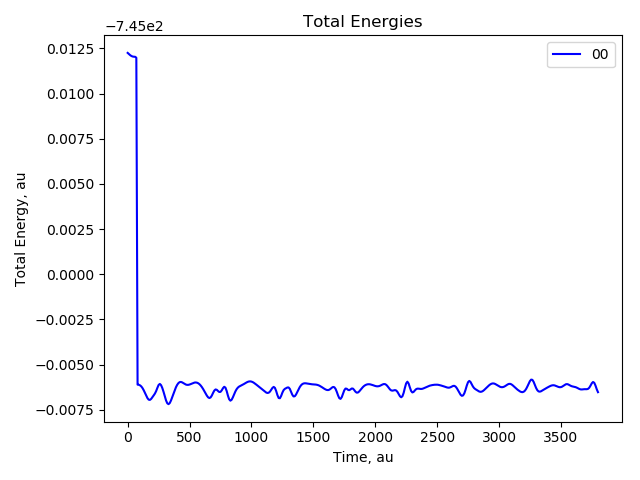

In [31]:
%matplotlib notebook
traj_plot.plot_total_energies(time, toten, labels, labels_to_plot_widget.value, istates, colors, markers, linestyles)

# Total Population

<IPython.core.display.Javascript object>


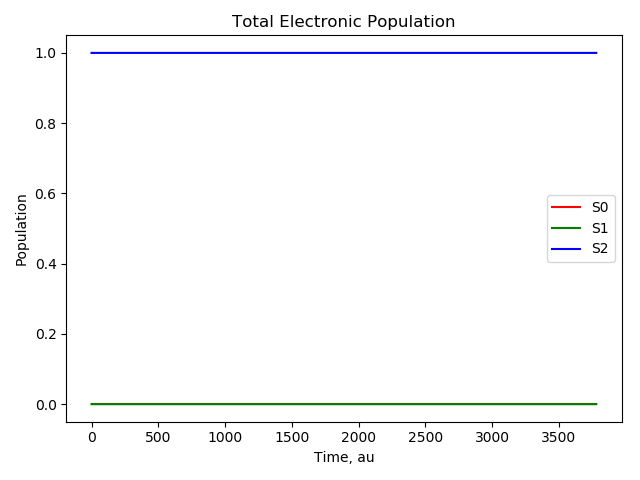

In [32]:
populated_states = np.amax(istates) + 1
traj_plot.plot_total_pop(times, mull_pop, populated_states, colors)

# Plotting Potential Energies

In [33]:
display(labels_to_plot_widget)

SelectMultiple(description=u'Trajectories', index=(0,), options=('00', '00b0'), rows=10, value=('00',))

<IPython.core.display.Javascript object>


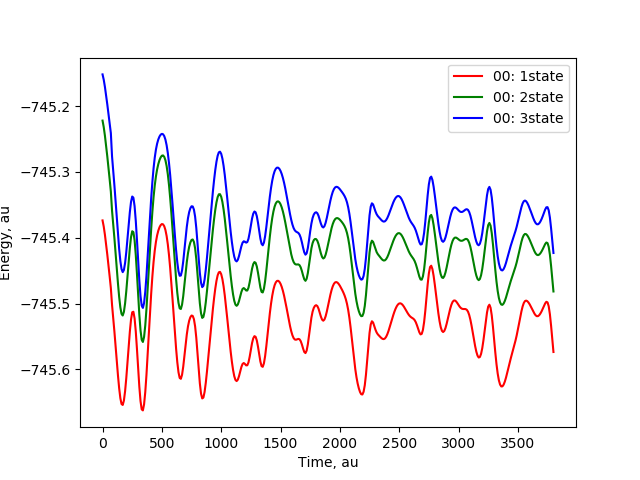

In [34]:
%matplotlib notebook
traj_plot.plot_energies(labels_to_plot_widget.value, time, poten, nstates, colors, linestyles)

# Plotting Energy gaps

In [35]:
display(labels_to_plot_widget)

SelectMultiple(description=u'Trajectories', index=(0,), options=('00', '00b0'), rows=10, value=('00',))

<IPython.core.display.Javascript object>


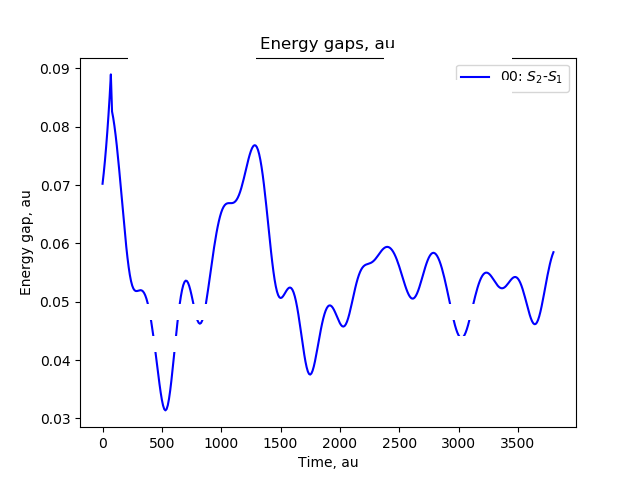

In [36]:
%matplotlib notebook
# Gap between ground and first excited states
state1 = 1
state2 = 2
# plot_e_gap(labels_to_plot_widget.value, time, poten, nstates, s1, s2)
traj_plot.plot_e_gap(time, poten, labels, labels_to_plot_widget.value, state1, state2, istates,
                     colors, linestyles, markers)

<IPython.core.display.Javascript object>


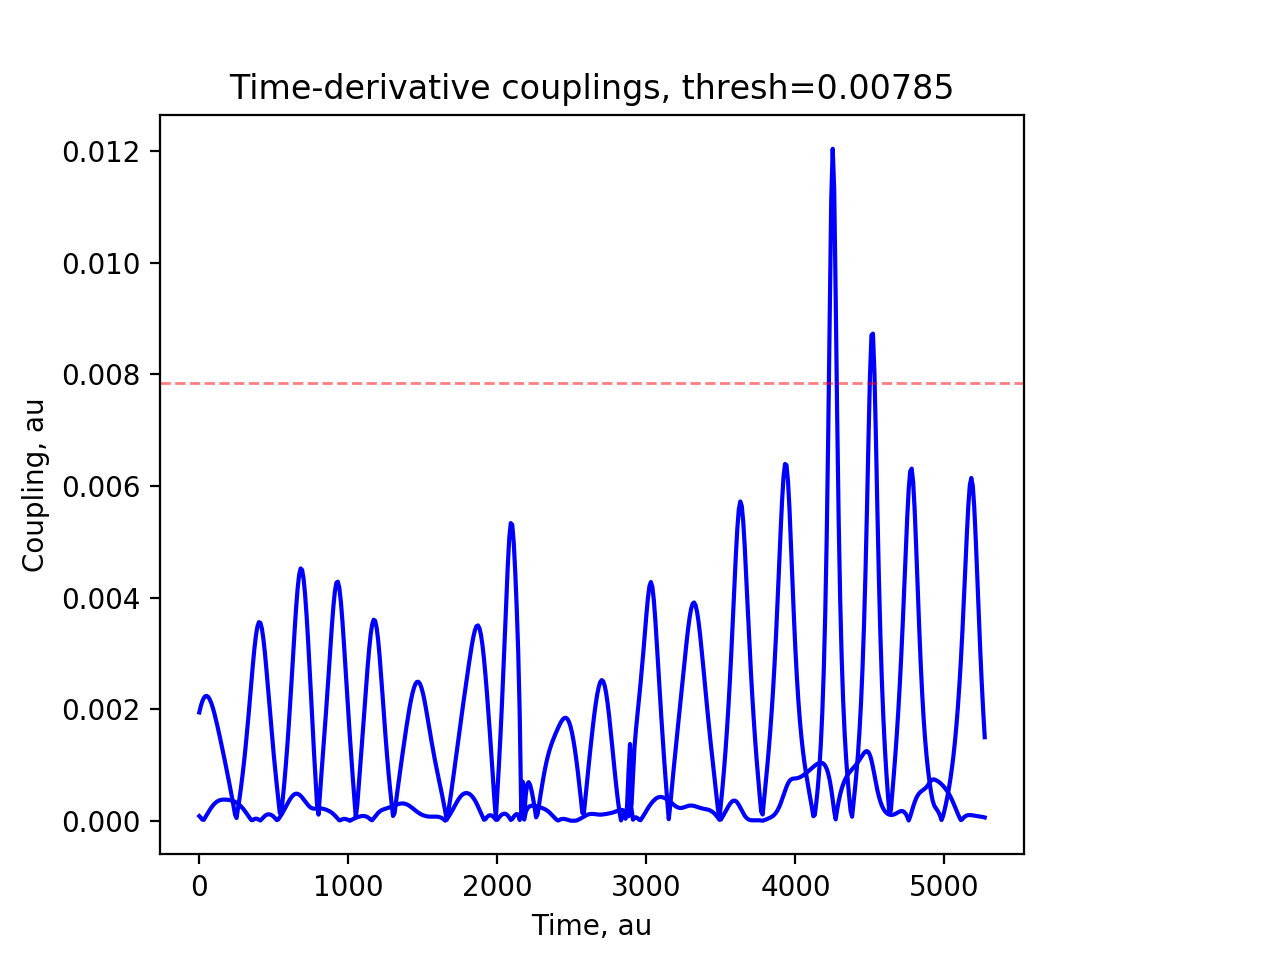

In [19]:
%matplotlib notebook
spawnthresh = 0.00785
# plot_tdc(labels, time, tdc, nstates, spawnthresh)
traj_plot.plot_tdc(time, tdc, labels, labels_to_plot_widget.value,
                   nstates, istates, spawnthresh, colors, linestyles, markers)

# Trajectory visualization

In this widget we pick the trajectory label to visualize

In [37]:
xyz_widget = widgets.RadioButtons(
    options=labels,
#     value='pineapple',
    description='Trajectory:',
    disabled=False
)
display(xyz_widget)


RadioButtons(description=u'Trajectory:', options=('00', '00b0'), value='00')

In [39]:
print "Trajectory:", xyz_widget.value
path_to_xyz = dir_name + "/traj_" + xyz_widget.value + ".xyz"
print "Path to xyz file:", path_to_xyz
traj = mda.Universe(path_to_xyz)
w = nv.show_mdanalysis(traj)
w

Trajectory: 00b0
Path to xyz file: /Users/Dmitry/Documents/Research/cn9n/casscf_2x3_t800_methyl/1/traj_00b0.xyz


NGLWidget(count=374)